# A First Empirical Exploration of Machine Learning Concepts

## Basics
In the following, we will lay out a few core definitions of Machine Learning concepts. We will then explore those concepts in simple cases.

### A Simple Regression Task

In this first exploration we will consider the *regression task* in which we are given a *training set* $S=\{(x_1,y_1),\ldots,(x_m,y_m)\}$ of *examples* $(x_i,y_i)$, where: 
+ $x_i \in {\cal X}$ is called the *input* or the *instance*, 
+ ${\cal X}$ is the *domain set*, 
+ $y_i\in{\cal Y}$ is called the *output*, the *target* or the *label* and 
+ ${\cal Y}$ the *label set*. 

Our strategy to solve the regression task is to *learn* a *model* $h:{\cal X}\rightarrow {\cal Y}$ or to "teach" a learner to come up with a prediction rule to predict the ouputs associated to the inputs. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train = pd.read_csv("./simpledata_train.csv")
train.shape

(50, 2)

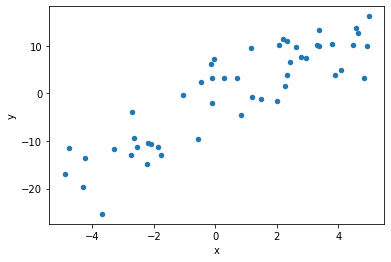

In [11]:
train.plot.scatter("x", "y")

### A Simple Regression Model
As a simple learner we will consider a **nearest neighbor regressor**. The nearest neighbor prediction rule is based on pooling the outputs of the nearest instances to take a decision. Given an instance $z\in{\cal X}$ the predicted output of a $k-$nearest neighbor regressor will be $$h(z)=\frac{1}{k}\sum_{i\in{\cal N}_k(z, S)} y_i$$ where ${\cal N}_k(z, S)$ is the set of the $k$ nearest instances in $S$ to $z$ according to a pre-specified distance.

In [12]:
from sklearn import neighbors
# #############################################################################
# Fit regression model
k = 2
X = train["x"].values[:,np.newaxis] # column matrix instead of line vector
y = train["y"]

knn = neighbors.KNeighborsRegressor(k)
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

To visualise the prediction rule lets compute the prediction for a range of points in the support of the instances:  

Text(0.5, 1.0, 'KNeighborsRegressor k = 2')

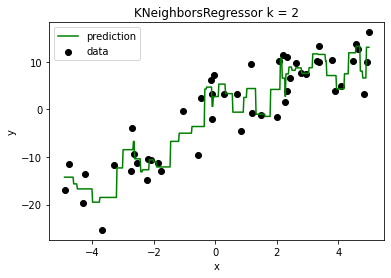

In [13]:
xsupport = pd.DataFrame(np.linspace(min(train.x),max(train.x),500))
y_ = knn.predict(xsupport)

plt.scatter(train["x"], train["y"], c='k', label='data')
plt.plot(xsupport, y_, c='g', label='prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("KNeighborsRegressor k = " + str(k))

### How good is the prediction?
To measure how good the prediction rule $h_S(x)=\hat{y}$ learned over training set $S$ is for an example $(x,y)$ we compute the *squared residual error* $(\hat{y}-y)^2$. To measure how good the prediction is on a set of examples we compute a *loss function* for example the *mean squared error (MSE)*. The training error is the loss function computed over the training set: $$l(S,h_S)=\frac{1}{m} \sum_{(x_i,y_i)\in S} (h_S(x_i)-y_i)^2 $$

In [14]:
from sklearn.metrics import mean_squared_error
yhat_train = knn.predict(X)
mean_squared_error(y, yhat_train)

12.366034124597014

The training examples where generated by an unknown distribution ${\cal D}$. Another measure of success is how good is our prediction rule on unseen examples generated by the same distribution ${\cal D}$. The *generalisation error* is the loss function computed on a *test* set $E$ sampled from distribution ${\cal D}$:
$$l(E,h_S)=\frac{1}{m_E} \sum_{(x_i, y_i)\in E} (h_S(x_i)-y_i)^2 $$

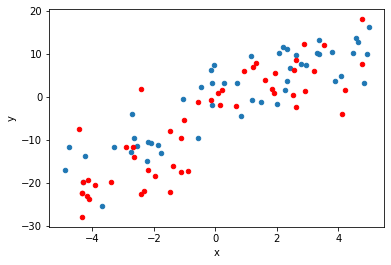

In [15]:
from unknown_distrib import data_sample
train2 = data_sample(50)

ax=train.plot(kind="scatter", x="x", y="y")
train2.plot(kind="scatter", x="x", y="y",ax=ax, color="red")

In [16]:
#Q2
from sklearn.metrics import mean_squared_error
test = pd.read_csv("./simpledata_test.csv")
x2 = test["x"].values[:,np.newaxis] # column matrix instead of line vector
y2 = test["y"]
y2hat_test = knn.predict(x2)
mean_squared_error(y2, y2hat_test)



35.03502108936178

In [17]:
#Q3
from sklearn.metrics import explained_variance_score
a=explained_variance_score(y, yhat_train)
b=explained_variance_score(y2,y2hat_test)
print("Training explained variance ="+str(round(a,5)))
print("Generalisation errors explained variance ="+str(round(b,5)))

Training explained variance =0.88189
Generalisation errors explained variance =0.60494


In [18]:
#Q4
from sklearn import neighbors
from unknown_distrib import data_sample
from sklearn.metrics import mean_squared_error
from numpy import var
loop = 100
train_list = []
general_list = []

for i in range(loop):
    #Generate a training set
    train4 = data_sample(50)
    k4 = 2
    x4 = train4["x"].values[:,np.newaxis]
    y4 = train4["y"]
    #Training on 'train4'
    knn4 = neighbors.KNeighborsRegressor(k4)
    knn4.fit(x4, y4)
    #Prediction on 'train4'
    y_train4 = knn4.predict(x4)
    #Then measure how good is prediction
    a=mean_squared_error(y4, y_train4)
    train_list.append(a)
    #Generate an other set for generalisation errors
    test4 = data_sample(50)
    x4 = test4["x"].values[:,np.newaxis]
    y4 = test4["y"]
    #Prediction on 'test' after training on 'train'
    y_test4 = knn4.predict(x4)
    #Then measure prediction quality
    b=mean_squared_error(y4, y_test4)
    general_list.append(b)
    
train_mean = sum(train_list)/len(train_list)
train_variance = var(train_list)
general_mean = sum(general_list)/len(general_list)
general_variance = var(general_list)
print("Training error: Mean="+str(round(train_mean,5))+" , Variance="+str(round(train_variance,5)))
print("Generalisation error: Mean="+str(round(general_mean,5))+" , Variance="+str(round(general_variance,5)))

Training error: Mean=13.13857 , Variance=11.73022
Generalisation error: Mean=38.97743 , Variance=61.90507


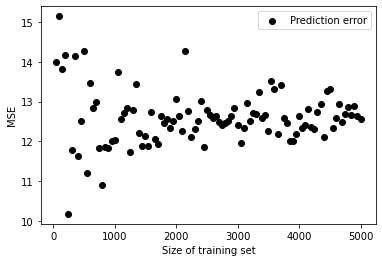

In [60]:
#Q5
from sklearn import neighbors
from unknown_distrib import data_sample
from sklearn.metrics import mean_squared_error
from numpy import var
#Generate a training set
set_size = 50
k5 = 2
sample_size_list = []
error_list = []

for i in range(100):
    sample_size = set_size*(i+1)
    train5 = data_sample(sample_size)
    x5 = train5["x"].values[:,np.newaxis]
    y5 = train5["y"]
    #Training on 'train5'
    knn5 = neighbors.KNeighborsRegressor(k5)
    knn5.fit(x5, y5)
    #Prediction on 'train5'
    y_train5 = knn5.predict(x5)
    #Then measure how good is prediction & store it in list
    a=mean_squared_error(y5, y_train5)
    error_list.append(a)
    sample_size_list.append(sample_size)
    
plt.scatter(sample_size_list, error_list, c='k', label='Prediction error')
plt.xlabel("Size of training set")
plt.ylabel("MSE")
plt.legend()
    

> ## Questions:
> 1. What is the domain set in the simple dataset?    **#Q1 [-5;5]**
> 1. Compute the generalisation error using `simpledata_test.csv`.
> 1. As a loss function we could also consider the [explained variance](https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score). How does it relate to MSE? Compute training and generalisation errors for this loss function.
> 1. How dependent is the prediction on the training set? Lets assume we can ask for another training set (see next section). Compute the training and generalisation error for this new training set. Repeat the experiment several times in order to get a mean and a variance.
> 1. How dependent is the prediction on the size of the training set? Draw a plot to visualise it.
> 1. How dependent is the prediction on the hyperparameter $k$? Draw a plot to visualise it.

## Unlimited sample simulation

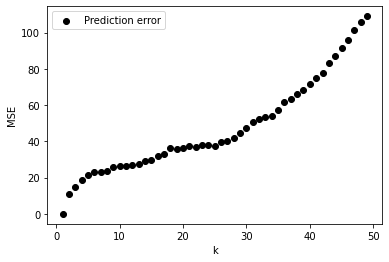

In [63]:
#Q6
from sklearn import neighbors
from unknown_distrib import data_sample
from sklearn.metrics import mean_squared_error
from numpy import var
#Generate a training set
sample_size = 50
train6 = data_sample(sample_size)
x6 = train6["x"].values[:,np.newaxis]
y6 = train6["y"]

k_size_list = []
error_list = []

for i in range(1,sample_size):
    #Training on 'train6'
    knn6 = neighbors.KNeighborsRegressor(i)
    knn6.fit(x6, y6)
    #Prediction on 'train6'
    y_train6 = knn6.predict(x6)
    #Then measure how good is prediction & store it in list
    a=mean_squared_error(y6, y_train6)
    error_list.append(a)
    k_size_list.append(i)
    
plt.scatter(k_size_list, error_list, c='k', label='Prediction error')
plt.xlabel("k")
plt.ylabel("MSE")
plt.legend()
